In [1]:
import cv2

In [2]:
import os

In [3]:
import numpy as np

In [4]:
train_dir = r"C:\Users\teoht\OneDrive\Library\AI\Data\Pneumonia\train"
test_dir = r"C:\Users\teoht\OneDrive\Library\AI\Data\Pneumonia\test"

In [5]:
from tensorflow.keras.applications import resnet50,ResNet50

In [6]:
from tensorflow.keras.preprocessing import image

In [7]:
model = ResNet50(weights="imagenet", include_top=False, input_shape=(150,150,3))

In [8]:
img = cv2.imread(r"C:\Users\teoht\OneDrive\Library\AI\Data\Pneumonia\train\NORMAL\IM-0115-0001.jpeg")

In [9]:
img = cv2.resize(img,(150,150))

In [10]:
img = image.img_to_array(img)

In [11]:
img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))

In [12]:
img = model.predict(img)

1/1 [==============================] - 3s 3s/step


In [13]:
img = img.flatten()

In [14]:
X_train = []
Y_train = []

In [15]:
for i in os.listdir(train_dir):
    print(i)
    for j in os.listdir(train_dir + "/" + i + "/"):
        img = cv2.imread(train_dir + "/" + i + "/" + j)
        img = cv2.resize(img,(150,150))
        img = image.img_to_array(img)
        img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))
        img = model.predict(img)
        X_train.append(img.flatten()/255)
        Y_train.append(i)

NORMAL
1/1 [==============================] - 0s 187ms/step
PNEUMONIA
1/1 [==============================] - 1s 850ms/step


In [16]:
X_test = []
Y_test = []

In [17]:
for i in os.listdir(test_dir):
    print(i)
    for j in os.listdir(test_dir + "/" + i + "/"):
        img = cv2.imread(test_dir + "/" + i + "/" + j)
        img = cv2.resize(img,(150,150))
        img = image.img_to_array(img)
        img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))
        img = model.predict(img)
        X_test.append(img.flatten()/255)
        Y_test.append(i)

NORMAL
1/1 [==============================] - 1s 955ms/step
PNEUMONIA
1/1 [==============================] - 2s 2s/step


In [18]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

model = linear_model.LogisticRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[100 134]
 [  1 389]]
accuracy is  0.7836538461538461


In [ ]:
from sklearn import ensemble

model = ensemble.RandomForestClassifier()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

In [ ]:
from sklearn import neural_network

model = neural_network.MLPClassifier()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

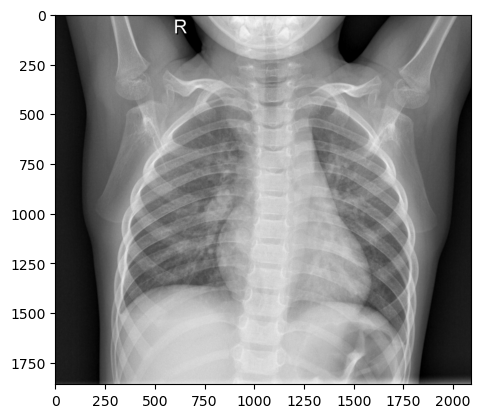

In [19]:
import cv2
img =cv2.imread(r"C:\Users\teoht\OneDrive\Library\AI\Data\Pneumonia\train\NORMAL\IM-0115-0001.jpeg")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()